### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th><th>Key</th></tr>
<tr><td>survival</td><td> Survival </td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td> <td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>name </td><td>Passenger Name	</td></tr>
<tr><td>sex </td><td>Sex 	</td></tr>
<tr><td>Age </td><td>Age in years 	</td></tr>
<tr><td>sibsp </td><td>Number of siblings / spouses aboard the Titanic</td></tr>
<tr><td>parch </td><td>Number of parents / children aboard the Titanic</td></tr>
<tr><td>ticket </td><td>Ticket number</td></tr>
<tr><td>fare </td><td>Passenger fare </td></tr>
<tr><td>cabin </td><td>Cabin number </td></tr>
<tr><td>embarked </td><td>Port of Embarkation</td><td> C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>

#### Titanic dataset Survival Classification

1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict Survived column count on a countplot<br>
4) Depict Survived column count based on Sex on a countplot<br>
5) Depict Survived column count based on Pclass on a countplot<br>
6) Depict quartile distribution of Age column for each of Pclass categories<br>
7) Encode categorical varibles if any<br>
8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable<br>
9) Split the dataset into training and testing data with test_size=25%<br>
10) Apply Logistic Regression and generate the predicted values for the test data<br>
11) Compute training and testing accuracy<br>
12) Generate confusion matrix. Also represnet it on heatmap<br>
13) Generate classifictaion_report<br>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Downloads/titanic.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Remove\Handle null values 

In [6]:
df[["name1","name2"]]=df["Name"].str.split(",",n=1,expand=True)

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,name2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina


In [8]:
df[['sal','name2']] = df['name2'].str.split('.',n=1,expand=True)

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,name2,sal
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss


# Remove the cabin column due large number of null values and it is not much appropriate feature while checking with corr

In [ ]:
df.head(2)

### Age column and Salutation columns both are dependent considering insight of data so null value can be justified

### Age column and Salutation columns both are dependent considering insight of data so null value can be justified

In [10]:
df['Age'] = df['Age'].fillna(df.groupby(['sal'])['Age'].transform(np.mean))

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,name2,sal
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Moran,James,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Mrs


### removing unwanted column in dataset lyk name 1 name2

In [12]:
df.pop('name1')
df.pop('name2')

0                                 Owen Harris
1       John Bradley (Florence Briggs Thayer)
2                                       Laina
3               Jacques Heath (Lily May Peel)
4                               William Henry
                        ...                  
886                                    Juozas
887                            Margaret Edith
888                  Catherine Helen "Carrie"
889                               Karl Howell
890                                   Patrick
Name: name2, Length: 891, dtype: object

In [36]:
df.dropna(inplace=True)#removing the null value completely

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
sal            0
dtype: int64

In [38]:
df.pop('Cabin') #removing cabin

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 202, dtype: object

#### Notice the 31 row age value is 35.898 it means value which i made justifies the age value with none value i suggest above method to handle null value to justifying value in the data set so the model prediction accuracy may increase

In [102]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sal
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,1,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,PP 9549,16.7000,1,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,113783,26.5500,1,Miss
21,22,1,2,"Beesley, Mr. Lawrence",1,34.000000,0,0,248698,13.0000,1,Mr
23,24,1,1,"Sloper, Mr. William Thompson",1,28.000000,0,0,113788,35.5000,1,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.000000,3,2,19950,263.0000,1,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,35.898148,1,0,PC 17569,146.5208,2,Mrs
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.000000,1,0,PC 17572,76.7292,2,Mrs


### Depict Survived column count on a countplot
### Depict Survived column count based on Sex on a countplot
### Depict Survived column count based on Pclass on a countplot
### Depict quartile distribution of Age column for each of Pclass categories

In [13]:
df['Survived'] = df['Survived'].replace({0:'not survived',1:'survived'})

c:\users\rohit r deeran\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


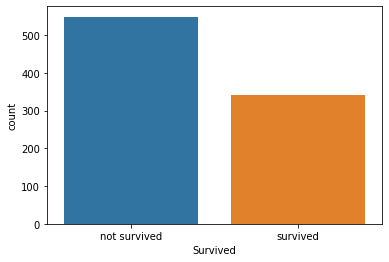

In [19]:
sns.countplot(df['Survived'])
plt.show()


c:\users\rohit r deeran\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

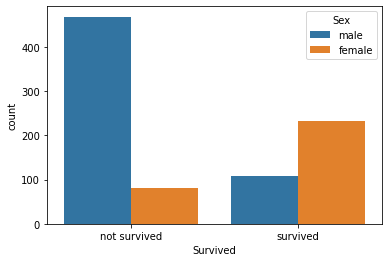

In [15]:
sns.countplot(df['Survived'],hue=df['Sex'])

c:\users\rohit r deeran\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


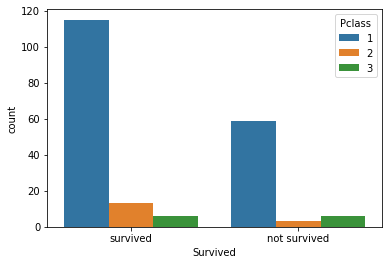

In [35]:
sns.countplot(df['Survived'],hue=df['Pclass'])
plt.show()

c:\users\rohit r deeran\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


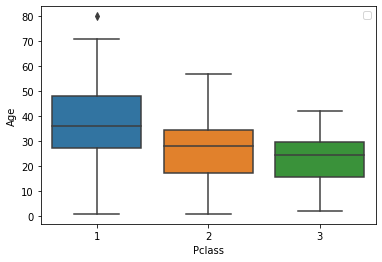

In [62]:
#Quartile distribution
sns.boxplot(df['Pclass'],df['Age'])
plt.legend()
plt.show()

### Encode categorical variable any available for proceeding the ML model

In [42]:
df['Embarked'] = df['Embarked'].replace({'S':1,'C':2,'Q':3})
df['Sex'] = df['Sex'].replace({'female':0,'male':1})
df['Survived'] = df['Survived'].replace({'not survived':0,'survived':1})

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sal
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,1,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,1,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,1,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,1,Mrs
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,1,Mr
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,Miss


### Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable

In [45]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.111985,-0.084147,0.000877,0.035126,-0.081137,-0.064538,0.017465,-0.033289
Survived,0.111985,1.000000,-0.030513,-0.545297,-0.236031,0.138202,0.042456,0.128261,0.098215
Pclass,-0.084147,-0.030513,1.000000,-0.060014,-0.305041,-0.086972,0.056288,-0.311740,-0.093935
Sex,0.000877,-0.545297,-0.060014,1.000000,0.172258,-0.152552,-0.110574,-0.137185,-0.090463
Age,0.035126,-0.236031,-0.305041,0.172258,1.000000,-0.142251,-0.257469,-0.076628,0.064169
SibSp,-0.081137,0.138202,-0.086972,-0.152552,-0.142251,1.000000,0.262348,0.291777,0.025391
Parch,-0.064538,0.042456,0.056288,-0.110574,-0.257469,0.262348,1.000000,0.384970,-0.089424
Fare,0.017465,0.128261,-0.311740,-0.137185,-0.076628,0.291777,0.384970,1.000000,0.195429
Embarked,-0.033289,0.098215,-0.093935,-0.090463,0.064169,0.025391,-0.089424,0.195429,1.000000


In [57]:
df1 = df.copy()

In [58]:
df1 = df1.iloc[:,[2,4,5,6,7,9,10,1]]


In [60]:
df1.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,1,0,38.000000,1,0,71.2833,2,1
3,1,0,35.000000,1,0,53.1000,1,1
6,1,1,54.000000,0,0,51.8625,1,0
10,3,0,4.000000,1,1,16.7000,1,1
11,1,0,58.000000,0,0,26.5500,1,1
21,2,1,34.000000,0,0,13.0000,1,1
23,1,1,28.000000,0,0,35.5000,1,1
27,1,1,19.000000,3,2,263.0000,1,0
31,1,0,35.898148,1,0,146.5208,2,1
52,1,0,49.000000,1,0,76.7292,2,1


### Split train and test data

In [69]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [70]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,2
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,1
872,1,1,33.0,0,0,5.0000,1
879,1,0,56.0,0,1,83.1583,2
887,1,0,19.0,0,0,30.0000,1


In [71]:
y.head(10)

1     1
3     1
6     0
10    1
11    1
21    1
23    1
27    0
31    1
52    1
Name: Survived, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [74]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
307,1,0,17.00000,1,0,108.9000,2
571,1,0,53.00000,2,0,51.4792,1
689,1,0,15.00000,0,1,211.3375,1
776,3,1,32.36809,0,0,7.7500,3
681,1,1,27.00000,0,0,76.7292,2
...,...,...,...,...,...,...,...
839,1,1,32.36809,0,0,29.7000,2
97,1,1,23.00000,0,1,63.3583,2
54,1,1,65.00000,0,1,61.9792,2
625,1,1,61.00000,0,0,32.3208,1


In [76]:
y_test.head(10)

505    0
809    1
62     0
591    1
473    1
789    0
110    0
536    0
871    1
435    1
Name: Survived, dtype: int64

### Train the model and test it with test data

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg = LogisticRegression()

In [79]:
lg.fit(x_train,y_train)

c:\users\rohit r deeran\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = lg.predict(x_test)

In [81]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Compute training and testing accuracy

In [82]:
print('the training score of the model : ',lg.score(x_train,y_train))
print('the testing score of the model : ',lg.score(x_test,y_test))

the training score of the model :  0.7615894039735099
the testing score of the model :  0.7254901960784313


### Generate confusion metrics and elaborate it on heat map

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [89]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [86]:
cm


array([[12,  7],
       [ 7, 25]], dtype=int64)

In [95]:
print('the accuracy score of model : ',accuracy*100)

the accuracy score of model :  72.54901960784314


In [93]:
print('the classification report :')
print(cr)

the classification report :
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.78      0.78      0.78        32

    accuracy                           0.73        51
   macro avg       0.71      0.71      0.71        51
weighted avg       0.73      0.73      0.73        51



No handles with labels found to put in legend.


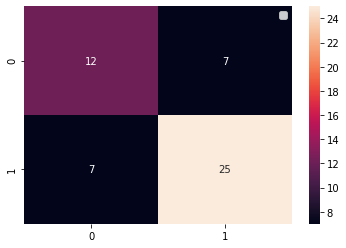

In [100]:
### Heat map on confusion matrix
sns.heatmap(cm,annot=True)
plt.legend()